<a href="https://colab.research.google.com/github/Yash-Narnaware/PG-Lab/blob/main/Yash_PG_Lab_assignment_5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Acquisition and Preprocessing**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

###Handle Missing Data

In [ ]:
#loading the dataset and checking if there are any null values in each column
tesla_data = pd.read_csv('https://raw.githubusercontent.com/Irshad760786/Tesla_stock_price-Dataset/main/TSLA.csv')
print(tesla_data.isnull().sum())  # check for missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#if there are any null values - replacing them with values from above row
tesla_data.fillna(method='ffill', inplace=True)
# tesla_data.dropna(inplace=True)

<ipython-input-27-3730f9bfe297>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tesla_data.fillna(method='ffill', inplace=True)


###Normalize Features

In [ ]:
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
#Converting data from 'Open' column to range 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
tesla_data['Open'] = scaler.fit_transform(tesla_data['Open'].values.reshape(-1, 1))

In [ ]:
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,0.000465,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,0.001568,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,0.001439,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,0.001114,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,0.000627,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,0.707663,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,0.740550,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,0.752750,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,0.793312,1040.699951,976.400024,999.109985,999.109985,40225400


###Data Preparation

In [ ]:
#defining time step
time_step = 50

#we need only 'Open' column from dataset
tesla_open_prices = tesla_data['Open'].values

#arrays to store data and its labels
X, y = [], []

#Storing 50 elements in X and 51 th element as its label in y and keep on incresing index till end of data
for i in range(len(tesla_open_prices) - time_step):
    X.append(tesla_open_prices[i:i+time_step])
    y.append(tesla_open_prices[i+time_step])

X, y = np.array(X), np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(2906, 50)
(2906,)


In [ ]:
#splitting the data for training and testing the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM

###Simple RNN Implementation

In [ ]:
#defining neural network structure
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=30, return_sequences=True, input_shape=(50, 1)))
RNN_model.add(SimpleRNN(units=30))
RNN_model.add(Dense(1))
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

RNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 30)              │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821 (11.02 KB)

 Trainable params: 2,821 (11.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the RNN model
history = RNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.2279e-04 - val_loss: 9.4713e-05
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2731e-04 - val_loss: 1.5232e-04
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2124e-04 - val_loss: 1.6839e-04
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6171e-04 - val_loss: 1.1704e-04
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2701e-04 - val_loss: 3.2111e-04
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4831e-04 - val_loss: 1.3255e-04
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6299e-04 - val_loss: 1.2173e-04
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5805e-04 - val_loss: 8.5852e-05
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0013e-04 - val_loss: 1.0841e-04
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0503e-04 - val_loss: 1.2481e-04
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5631e-0

In [ ]:
# Evaluate the RNN model on the test data
MSE_error = RNN_model.evaluate(X_test, y_test)
print("Mean square error on scaled test data:",MSE_error)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7397e-05
Mean square error on scaled test data: 0.00013299044803716242


###LSTM Implementation

In [ ]:
#defining neural network structure
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=20, return_sequences=True, input_shape=(50, 1)))
LSTM_model.add(LSTM(units=20))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

LSTM_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50, 20)              │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,061 (19.77 KB)

 Trainable params: 5,061 (19.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the LSTM model
hisory = LSTM_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073 - val_loss: 5.3008e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9180e-04 - val_loss: 4.4385e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6983e-04 - val_loss: 3.5375e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3549e-04 - val_loss: 3.9124e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2525e-04 - val_loss: 3.5385e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2933e-04 - val_loss: 3.7024e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2171e-04 - val_loss: 2.8362e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7467e-04 - val_loss: 2.5172e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9196e-04 - val_loss: 2.3776e-04
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0198e-04 - val_loss: 2.4908e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1131e-04 - val_loss

In [ ]:
# Evaluate the model on the test data
MSE_error = LSTM_model.evaluate(X_test, y_test)
print("Mean square error on scaled test data:",MSE_error)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2374e-04
Mean square error on scaled test data: 0.00022066863311920315


#**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
#Calculating different errors for RNN model
RNN_predicted_scaled = RNN_model.predict(X_test)
RNN_predicted_original = scaler.inverse_transform(RNN_predicted_scaled)
RNN_mse = mean_squared_error(original_y_test, RNN_predicted_original)
RNN_rmse = np.sqrt(RNN_mse)
RNN_mae = mean_absolute_error(original_y_test, RNN_predicted_original)

#Calculating different errors for LSTM model
LSTM_predictions_scaled = LSTM_model.predict(X_test)
LSTM_predictions_original = scaler.inverse_transform(LSTM_predictions_scaled)
LSTM_mse = mean_squared_error(original_y_test, LSTM_predictions_original)
LSTM_rmse = np.sqrt(LSTM_mse)
LSTM_mae = mean_absolute_error(original_y_test, LSTM_predictions_original)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
#printing different errors
print("MSE for RNN:",RNN_mse)
print("Root mean squared error for RNN:",RNN_rmse)
print("Mean absolute error for RNN:",RNN_mae)
print("\n")
print("MSE for LSTM:",LSTM_mse)
print("Root mean squared error for LSTM:",LSTM_rmse)
print("Mean absolute error for LSTM:",LSTM_mae)

MSE for RNN: 201.58809929873075
Root mean squared error for RNN: 14.198172392907855
Mean absolute error for RNN: 6.07342909359167


MSE for LSTM: 334.49153692802213
Root mean squared error for LSTM: 18.289109790474278
Mean absolute error for LSTM: 6.602807892046218


###Predicted vs actual stock price for RNN model

In [ ]:
RNN_predicted_scaled = RNN_model.predict(X_test)
RNN_predicted_original = scaler.inverse_transform(RNN_predicted_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


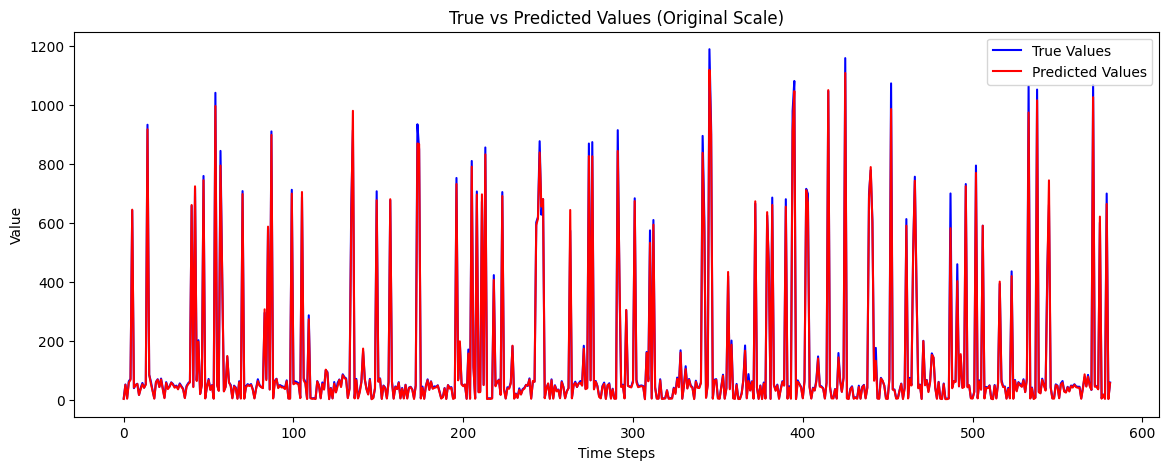

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(original_y_test, label="True Values", color='blue')
plt.plot(RNN_predicted_original, label="Predicted Values", color='red')
plt.title("True vs Predicted Values (Original Scale)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

###Predicted vs actual stock price for LSTM model

In [ ]:
predicted_scaled = LSTM_model.predict(X_test)
predicted_original = scaler.inverse_transform(predicted_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


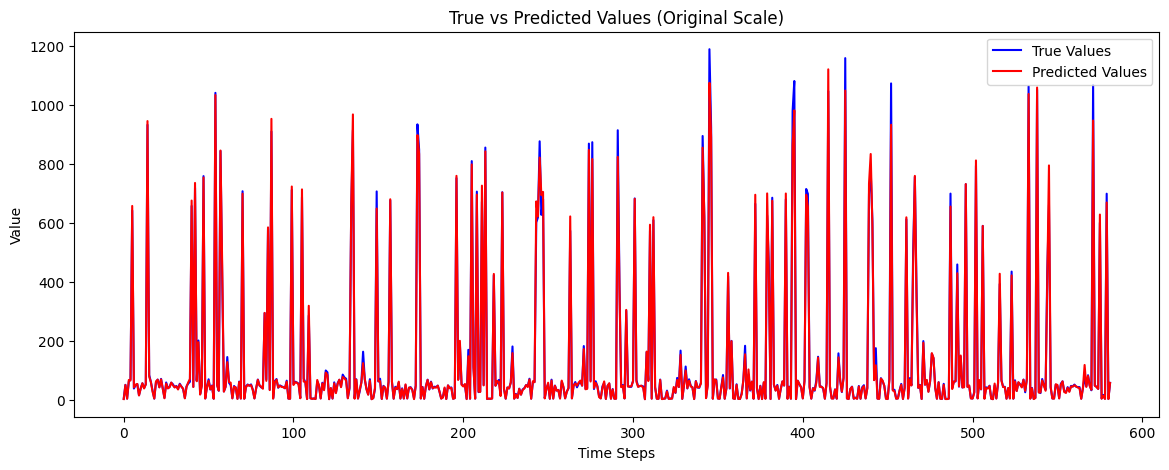

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(original_y_test, label="True Values", color='blue')
plt.plot(predicted_original, label="Predicted Values", color='red')
plt.title("True vs Predicted Values (Original Scale)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

#**Analysis and Discussion**

By looking at the plots of actual price vs predicted price for both networks, they accurately predict the results. The mean square error for the RNN model is 201.588 (it may vary when we run it again), and for LSTM, it is 334.491. By looking atb MSE values they are very low compared to stock opening prices which implies that our model is trained well.

I tried further improving the results by adding more nodes in each layer of both networks. Still, the improvement in MSE error I am getting is significantly less compared to increased computations, and improvement is also very minimal.

Theoretically, LSTM should have given us better results than RNN due to its ability to capture the long-term dependencies; RNN struggles with capturing the long-term dependencies due to vanishing gradient problems. But looking at our results, both model's performance is similar to each other(RNN giving slightly better result - lower MSE value)

LSTMs are better at capturing long-term dependencies than RNNs. RNNs are less computationally costly than LSTM; RNNs perform well on smaller datasets or data that don't require long-term memory. LSTMs can retain long-term memory, enabling them to capture more complex patterns than RNNs. Since we are looking only at the data from the previous 50 days to predict the next day, the RNN model performs better by a slight margin than LSTM. If we have to make a prediction based on many previous days, LSTM will perform better than RNNs.